In [106]:
# Dependencies
import pandas as pd
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [107]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [108]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [109]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results1 = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == 6).all()

In [110]:
#  3. Convert the June temperatures to a list.
temps_june=list(results1)

In [111]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_june_df=pd.DataFrame(temps_june, columns=['date', 'June Temperatures'])
temps_june_df.set_index(temps_june_df['date'], inplace=True)

In [112]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_june_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [113]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results2 = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == 12).all()

In [114]:
# 7. Convert the December temperatures to a list.
temps_december=list(results2)

In [115]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temps_december_df=pd.DataFrame(temps_december, columns=['date', 'December Temperatures'])
temps_december_df.set_index(temps_december_df['date'], inplace=True)

In [116]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temps_december_df.describe()

,December Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Summary: 
### Two additional queries that  would perform to gather more weather data for June and December.

In [135]:
# a. June percipitation and teampratures summary 
# a.1.filters the Measurement table to retrieve the temperatures and precipitation for the month of June 
prcp_temp_june= session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month', Measurement.date) ==6).all()
# a.2 Convert the June  precipitation and temperatures to a list
prcps_temps_june=list(prcp_temp_june)
# a.3 Create a DataFrame from the lists of the precipitation and temperatures for the month of June.
june_df=pd.DataFrame(prcps_temps_june, columns=['date', 'June Precipitation', 'June Temperatures'])
june_df.set_index(june_df['date'], inplace=True)
# a.4 Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Precipitation,June Temperatures
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [136]:
# b. December percipitation and teampratures summary 
# b.1.filters the Measurement table to retrieve the temperatures and precipitation for the month of December 
prcps_temps_december= session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month', Measurement.date) ==12).all()
# b.2 Convert the December  precipitation and temperatures to a list
prcps_temps_december=list(prcps_temps_december)
# b.3 Create a DataFrame from the lists of the precipitation and temperatures for the month of December.
december_df=pd.DataFrame(prcps_temps_december, columns=['date', 'December Precipitation', 'December Temperatures'])
december_df.set_index(december_df['date'], inplace=True)
# b.4 Calculate and print out the summary statistics for the December temperature DataFrame.
december_df.describe()

,December Precipitation,December Temperatures
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


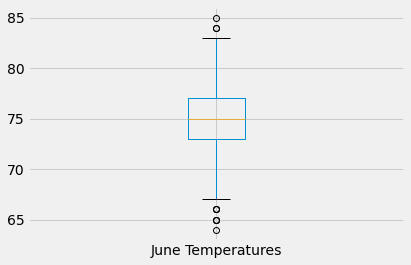

In [153]:
#for the analysis purpose
temps_june_df.boxplot()

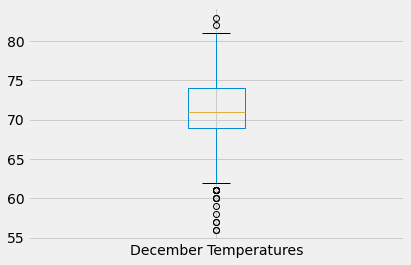

In [151]:
temps_december_df.boxplot()